### [Imports](#imports)  
### [Chargement du dataframe](#loading)    
### [Fonction de pré-traitement du jeu de données](#pre-traitement)  
### [Wordcloud après traitements](#wordcloudtreated)  
### [Lémmatisation](#lemmatisation)  
### [Stemming](#stemming)
### [Rappel nombres de variables cible dans le dataframe](#rappel_target)  
### [Régression Logistique modèle de base (Countvectorizer avec Lémmatisation)](#log_count_lem)  
### [Régression Logistique modèle de base (Countvectorizer avec Stemming)](#log_count_stem)   
### [Régression Logistique modèle de base (TF-IDF avec Lémmatisation)](#log_tfidf_lem)  
### [Régression Logistique modèle de base (TF-IDF avec Stemming)](#log_tfidf_stem)  
### [Graphique AUC-ROC meilleur modèle](#best_model)
### [SHAP du meilleur modèle](#shap_best_model)
### [Tableau des scores](#score_board)  
### [Affichage de l'interface MLFlow](#mlflow)  
### [Conclusion](#conclusion)

 # <center><a id='imports'>Imports</a></center>

In [1]:
# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

# Wordcloud
from wordcloud import WordCloud

# Functions notebook
from functions.functions import *

# Shap
import shap
shap.initjs()

c:\Users\romai\anaconda3\envs\P07\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <center><a id='loading'>Chargement du dataframe</a></center>

In [2]:
# data = pd.read_csv("csv/data.csv")

In [3]:
data = pd.read_csv("csv/data_40000.csv")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Chargement des dataframes contenants 2 000 et 40 000 tweets. 
</div>

 # <center><a id='pre-traitement'>Fonction de pré-traitement du jeu de données</a></center>

In [4]:
data["cleaned_tweet"] = data["tweet"]

In [5]:
tableau_score = []

In [6]:
data["cleaned_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [7]:
data["cleaned_tweet"]

0                                       the poor spartans 
1        lol so how is everyone and btw i have to go to...
2         laura thompson no cause i hate beer i love fr...
3        at home really thinking about my lifes path i ...
4        so tired of being unemployed last few jobs wer...
                               ...                        
39995    th update right now i really do have a better ...
39996     wanting to watch twilight again but i m going...
39997    out to breakfast andd car shopping with my dad...
39998    just set up my twitter page the ball has start...
39999                                        comeagainjen 
Name: cleaned_tweet, Length: 40000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pré-traitement du jeu de données, les traitements effectués sont : <br>
<ul>
    <li>Transformation des majuscules en minuscules</li>
    <li>Supprime les tweets d'une longueur supérieure à 150 caractères</li>
    <li>Convertis les émojis en texte</li>
    <li>Supprime les liens</li>
    <li>Supprime les chiffres dans tout le corpus</li>
    <li>Supprime les caractères spéciaux</li> 
</ul>
</div>

# <center><a id='wordcloudtreated'>Wordcloud après traitements</a></center>

In [8]:
wordcloud_lem = WordCloud(background_color='white', stopwords=[], max_words=50).generate(" ".join(data["cleaned_tweet"]))

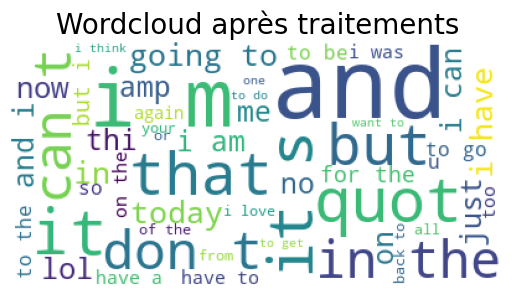

In [9]:
wordcloud_before_traitements(wordcloud_lem, "Wordcloud après traitements")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Après le traitement du langage  naturel, le graphique wordcloud contient une large majorité de mots contenant plus de 3 lettres, ces mots sont plus ciblés pour déterminer un sentiment que des mots qui ne sont pas traités.
</div>

# <center><a id='lemmatisation'>Lémmatisation</a></center>

In [10]:
data["lemmatized_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [11]:
data["lemmatized_tweet"] = data["lemmatized_tweet"].apply(lambda x: tokenize_tweet(x))

In [12]:
data['lemmatized_tweet'] = lemm_corpus(data["lemmatized_tweet"])

In [13]:
data['lemmatized_tweet']

0                                         the poor spartan
1        lol so how is everyone and btw i have to go to...
2        laura thompson no cause i hate beer i love fra...
3        at home really thinking about my life path i a...
4        so tired of being unemployed last few job were...
                               ...                        
39995    th update right now i really do have a better ...
39996    wanting to watch twilight again but i m going ...
39997    out to breakfast andd car shopping with my dad...
39998    just set up my twitter page the ball ha starte...
39999                                         comeagainjen
Name: lemmatized_tweet, Length: 40000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pour lemmatiser  les tweets, une tokénization est nécessaire pour pouvoir lémmatiser chaque mot d'un tweet, les traitements effectués sont :<br>
<ul>
    <li>Tokénization</li>
    <li>Lemmatisation </li>
</ul>
</div>

# <center><a id='stemming'>Stemming</a></center>

In [14]:
data["stemmed_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [15]:
data["stemmed_tweet"] = data["stemmed_tweet"].apply(lambda x: tokenize_tweet(x))

In [16]:
data['stemmed_tweet'] = stem_corpus(data["stemmed_tweet"])

In [17]:
data['stemmed_tweet'] 

0                                         the poor spartan
1        lol so how is everyon and btw i have to go to ...
2        laura thompson no caus i hate beer i love fram...
3        at home realli think about my life path i am i...
4        so tire of be unemploy last few job were so va...
                               ...                        
39995    th updat right now i realli do have a better u...
39996    want to watch twilight again but i m go to the...
39997    out to breakfast andd car shop with my daddddi...
39998    just set up my twitter page the ball ha start ...
39999                                         comeagainjen
Name: stemmed_tweet, Length: 40000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pour stemming les tweets, une tokénization est nécessaire pour pouvoir stemming chaque mot d'un tweet, les traitements effectués sont :<br>
<ul>
    <li>Tokénization</li>
    <li>Stemming</li>
</ul>
</div>

# <center><a id='rappel_target'>Rappel nombres de variables cible dans le dataframe</a></center>

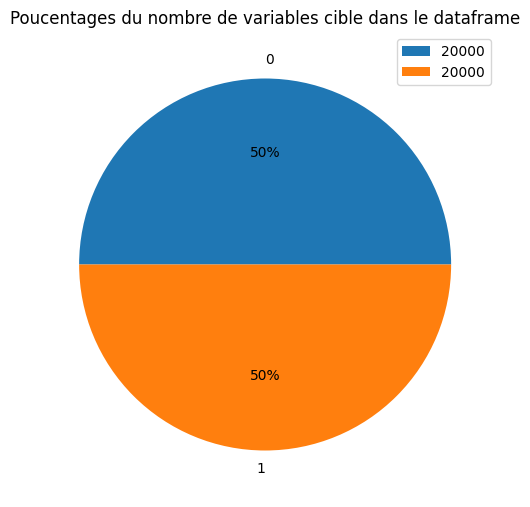

In [18]:
pie_chart_target(data["target"])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pour rappel, le découpage des sentiments se compose selon le dataframe de 1 000 ou 20 000 tweets positifs et de 1 000 ou 20 000 tweets négatifs.
</div>

# <center><a id='log_count_lem'>Régression Logistique modèle de base (Countvectorizer avec Lémmatisation)</a></center>

In [19]:
# from sklearn.preprocessing import make_pipeline

#         vectorizer = TfidfVectorizer()
#         model = LogisticRegression()
#         pipeline = make_pipeline(vectorizer, model)
#     if count == True:
#         vectorizer = CountVectorizer()
#         model = LogisticRegression()
#         pipeline = make_pipeline(vectorizer, model)
#     return pipeline

In [20]:
X = data['lemmatized_tweet']
y = data['target']

In [21]:
X_train_count_lem, X_test_count_lem, X_val_count_lem, y_train_count_lem, y_test_count_lem, y_val_count_lem = train_test_val_split(X, y)

In [22]:
log_count_lem, log_pred_count_lem, time_training_count_stem, tableau_score = all_models_generator("Régression Logistique Count Lemmatized", "REG_COUNT", 0, 0, 0, tableau_score, X_train_count_lem, X_test_count_lem, X_val_count_lem, y_train_count_lem, y_test_count_lem, y_val_count_lem)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
2023/03/30 23:56:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P07\lib\site-packages\mlflow\sklearn\__init__.py:1405: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`."
2023/03/30 23:56:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4000
           1       0.76      0.76      0.76      4000

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



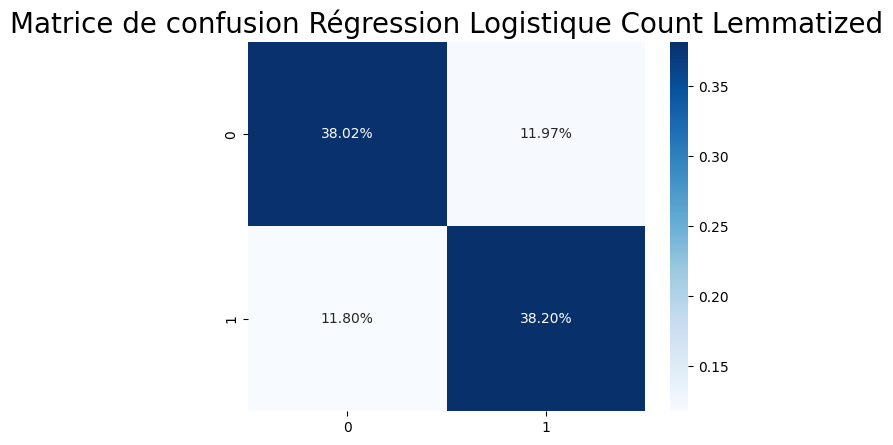

In [23]:
confusion_report_matrix("Matrice de confusion Régression Logistique Count Lemmatized", y_test_count_lem, log_pred_count_lem)

 # <center><a id='log_count_stem'>Régression Logistique modèle de base (Countvectorizer avec Stemming)</a></center>

In [24]:
X = data['stemmed_tweet']
y = data['target']

In [25]:
X_train_count_stem, X_test_count_stem, X_val_count_stem, y_train_count_stem, y_test_count_stem, y_val_count_stem = train_test_val_split(X, y)

In [26]:
log_count_stem, log_pred_count_stem, time_training_count_stem, tableau_score = all_models_generator("Régression Logistique Count Stemmed", "REG_COUNT", 0, 0, 0, tableau_score, X_train_count_stem, X_test_count_stem, X_val_count_stem, y_train_count_stem, y_test_count_stem, y_val_count_stem)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
2023/03/30 23:56:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P07\lib\site-packages\mlflow\sklearn\__init__.py:1405: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`."


              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4000
           1       0.76      0.77      0.76      4000

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



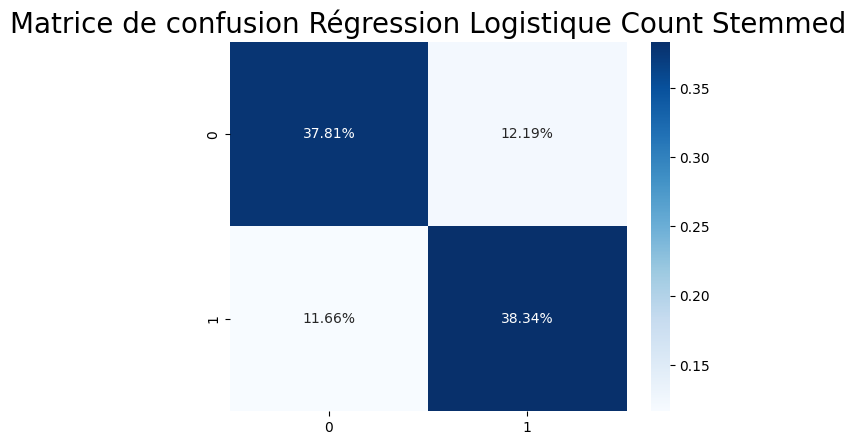

In [27]:
confusion_report_matrix("Matrice de confusion Régression Logistique Count Stemmed", y_test_count_stem, log_pred_count_stem)

# <center><a id='log_tfidf_lem'>Régression Logistique modèle de base (TF-IDF avec Lémmatisation)</a></center>

In [28]:
X = data['lemmatized_tweet']
y = data['target']

In [29]:
X_train_tfidf_lem, X_test_tfidf_lem, X_val_tfidf_lem, y_train_tfidf_lem, y_test_tfidf_lem, y_val_tfidf_lem = train_test_val_split(X, y)

In [30]:
log_tfidf_lem, log_pred_tfidf_lem, time_training_tfidf_lem, tableau_score = all_models_generator("Régression Logistique TF-IDF Lemmatized",  "REG_TFIDF", 0, 0, 0, tableau_score, X_train_tfidf_lem, X_test_tfidf_lem, X_val_tfidf_lem, y_train_tfidf_lem, y_test_tfidf_lem, y_val_tfidf_lem)

2023/03/30 23:56:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P07\lib\site-packages\mlflow\sklearn\__init__.py:1405: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`."


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4000
           1       0.77      0.76      0.77      4000

    accuracy                           0.77      8000
   macro avg       0.77      0.77      0.77      8000
weighted avg       0.77      0.77      0.77      8000



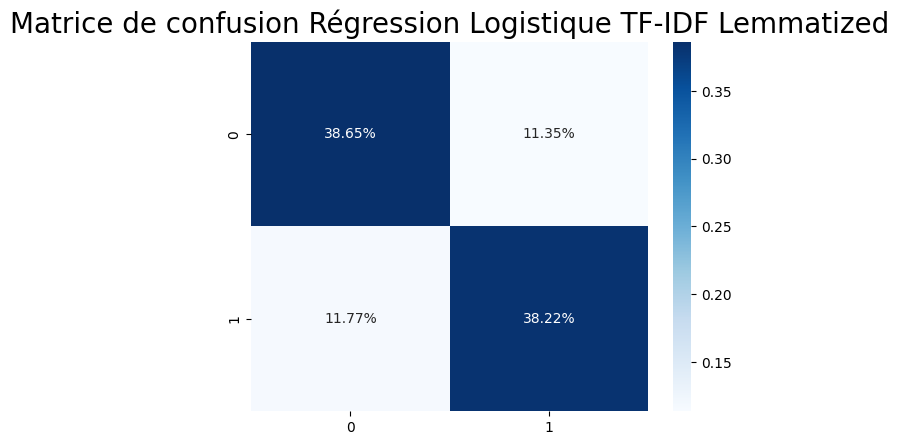

In [31]:
confusion_report_matrix("Matrice de confusion Régression Logistique TF-IDF Lemmatized", y_test_tfidf_lem, log_pred_tfidf_lem)

# <center><a id='log_tfidf_stem'>Régression Logistique modèle de base (TF-IDF avec Stemming)</a></center>

In [32]:
X = data['stemmed_tweet']
y = data['target']

In [33]:
X_train_tfidf_stem, X_test_tfidf_stem, X_val_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem, y_val_tfidf_stem = train_test_val_split(X, y)

In [34]:
log_tfidf_stem, log_pred_tfidf_stem, time_training_tfidf_stem, tableau_score = all_models_generator("Régression Logistique TF-IDF Stemmed", "REG_TFIDF", 0, 0, 0, tableau_score, X_train_tfidf_stem, X_test_tfidf_stem, X_val_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem, y_val_tfidf_stem)

2023/03/30 23:56:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P07\lib\site-packages\mlflow\sklearn\__init__.py:1405: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`."


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4000
           1       0.77      0.77      0.77      4000

    accuracy                           0.77      8000
   macro avg       0.77      0.77      0.77      8000
weighted avg       0.77      0.77      0.77      8000



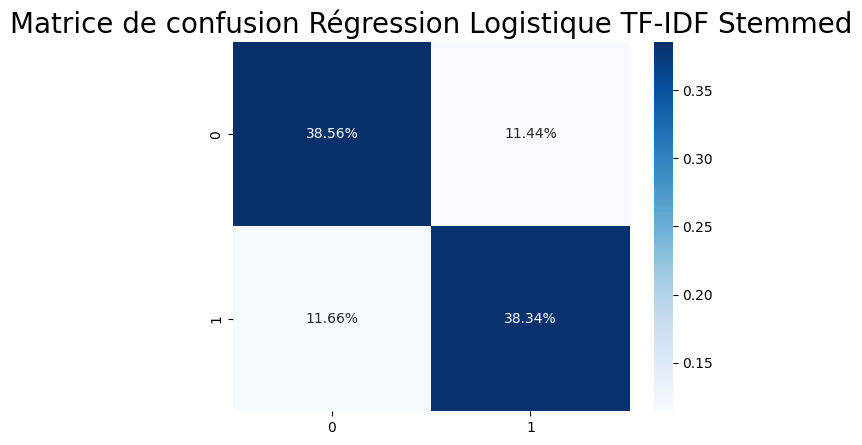

In [35]:
confusion_report_matrix("Matrice de confusion Régression Logistique TF-IDF Stemmed", y_test_tfidf_stem, log_pred_tfidf_stem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Les documents sont convertis en une matrice de données numériques avec la méthode CountVectorizer ou en méthode de pondération avec TF-IDF qui détermine l'importance des mots dans les documents, car l'ordinateur ne comprend pas les caractères et les mots.<br>
Les données lemmatisées ou stemming sont utilisées pour l'entraînement du modèle de Régression Logistique.<br>
Les données sont divisées en 3 ensembles :<br>
<ul>
<li>Données d'entraînement</li>
<li>Données de test</li>
<li>Données de validation</li>
</ul>
Le résultat des données qui ont été extrait avec la méthode TF-IDF, ont un meilleur résultat que celles qui l'ont été avec le Bag-Of-Word CountVectoriser que ces données soit lemmatiser ou stemming.<br>
Dans les matrices de confusions, le score de Vrai Positifs et de Vrai Négatif est largement supérieur aux Faux Positifs et au Faux Négatif.<br>
Le score AUC du modèle ayant les meilleurs résultats est d'environ 0.75 avec 40 000 tweets et environ 71 avec 2 000 tweets.
</div>

# <center><a id='best_model'>Graphique AUC-ROC meilleur modèle</a></center>

Aléatoire: ROC AUC= 0.500
Régression LogistiqueROC AUC= 0.769


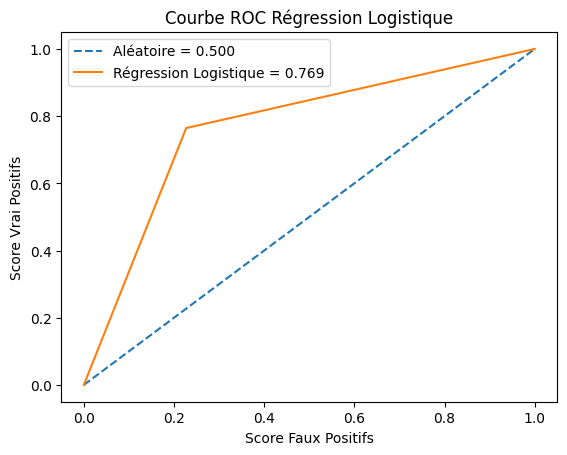

In [36]:
graph_courbe_roc(log_tfidf_lem,X_test_tfidf_lem, y_test_tfidf_lem, "Régression Logistique")

In [37]:
def clean_text(text):
    '''Traitement du langage naturel :
    - Transformation des majuscules en minuscules
    - Supprime les tweets d'une longueur supérieure à 150 caractères
    - Convertis les émojis en texte
    - Supprime les liens
    - Supprime les stop-words
    - Supprime les chiffres dans tout le corpus
    - Supprime les caractères spéciaux                                                                                                             
    '''

    text = str(text).lower() # Transforme les mots qui sont en majuscule en minuscule
    text = text if len(text) <= 150 else [] # Supprime les tweets d'une longueur supérieure à 150 caractères
    text = emoji.demojize(text) # Convertis les émojis en texte
    text = re.sub('https?://\S+|www\.\S+', '', text) # Supprime les liens
    # text = re.sub(re.compile(r'\b(' + r'|'.join(stopwords.words("english")) + r')\b\s*'), '', text) # Supprime les stop-words
    text = re.sub(r'[0-9]', '', text) # Supprime les chiffres dans tout le corpus
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text) # Supprime les caractères spéciaux
    text = re.sub(' +', ' ', text) # Supprime les espaces et n'en laisse qu'un s'ils y en a plus que 1

    return text

def tokenize_tweet(text):
    '''Traitement du langage naturel :
    - Tokenisation                                                                                                                
    '''

    text = word_tokenize(text) # Tokenisation
    return text
    
def lemm_corpus(text):
    '''Lémmatisation, racinisation, Suppression des suffixes, mais cette méthode donne un contexte aux mots'''

    text = " ".join([WordNetLemmatizer().lemmatize(i) for i in text])  # Lemmatisation du corpus
    return text


In [38]:
text = "i hate you"
text = clean_text(text)
text = tokenize_tweet(text)
text = lemm_corpus(text)

In [39]:
X_tfidf_lem = log_tfidf_lem[0].transform([text])

In [40]:
print(type(X_tfidf_lem))

<class 'scipy.sparse._csr.csr_matrix'>


In [43]:
log_tfidf_lem.predict(["i hate you so much"])

array([0], dtype=int64)

In [44]:
pickle.dump(log_tfidf_lem, open("log_tfidf_lem" + '.pkl', 'wb'))

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Dans ce graphique, une courbe et une ligne sont visibles :<br>
<ul>
<li>Une ligne aléatoire (quand le modèle prédit au hasard)</li>
<li>Une courbe Régression Logistique (le score AUC du meilleur modèle de Régression Logistique)</li>
</ul>
Le score AUC du meilleur modèle de Régression Logistique est plutôt bon.
</div>

# <center><a id='shap_best_model'>SHAP du meilleur modèle</a></center>

In [42]:
explainer = shap.Explainer(log_count_lem, X_train_count_lem, feature_names=count_vect_lem_features)
shap_values = explainer(X_test_count_lem)

NameError: name 'count_vect_lem_features' is not defined

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


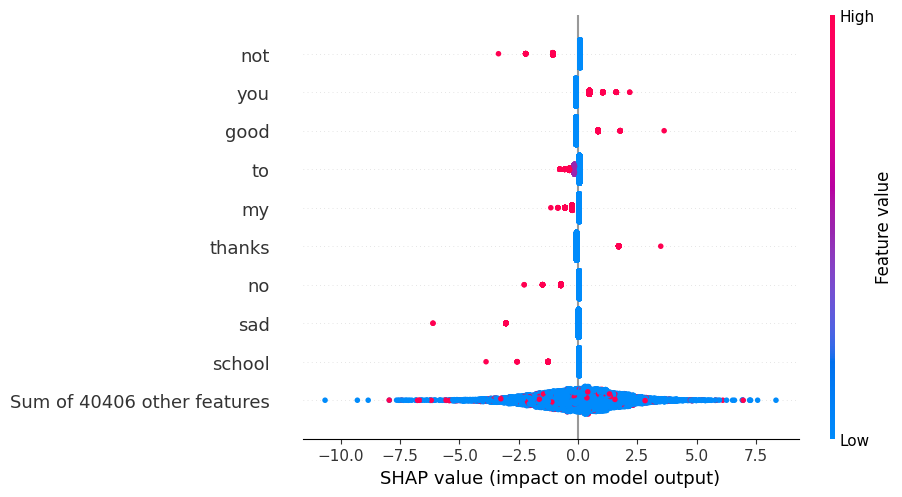

In [ ]:
shap.plots.beeswarm(shap_values)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Dans ce graphique Beeswarm, indique si les mots ont une relation fortement ou faiblement Positif ou Négatif.<br>
<ul>
<li>Good a une forte relation positif</li>
<li>Sad a une forte relation Négative</li>
<li>Lol a une forte relation positif</li>
<li>Hope a une forte relation positif</li>
<li>Happy a une forte relation positif</li>
</ul>
</div>

# <center><a id='score_board'>Tableau des scores</a></center>

In [ ]:
tableau_score = pd.DataFrame(tableau_score)

In [ ]:
tableau_score

,Nom du modèle,Temps d'entraînement,AUC-score_test,AUC-score_val,F1-score_test,F1-score_val,Précision-score_test,Précision-score_val,Rappel-score_test,Rappel-score_val,F-bêta-score_test,F-bêta-score_val,accuracy-score_test,accuracy-score_val
0,Régression Logistique Count Lemmatized,6.502061,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813
1,Régression Logistique Count Stemmed,5.021951,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594
2,Régression Logistique TF-IDF Lemmatized,4.712904,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625
3,Régression Logistique TF-IDF Stemmed,4.438920,0.768375,0.764062,0.768375,0.764063,0.768375,0.764062,0.768375,0.764062,0.768375,0.764062,0.768375,0.764062


In [ ]:
tableau_score.to_csv("csv/tableau_score.csv", index=False) 

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Ce tableau des scores représentes les résultats des modèles de Régression Logistique lemmatisé ou stemming et vectoriser avec CountVectorizer ou avec TF-IDF.<br>
Il affiche des informations concernant :<br>
<ul>
<li>Le nom de modèle</li>
<li>Le temps d'entraînement</li>
<li>Les valeurs de Test et de validation AUC, Accuracy, F1-score, Précision, Rappel et F-bêta</li>
</ul>
Le meilleur modèle est : Régression Logistique TF-IDF Lemmatized.
</div>

# <center><a id='mlflow'>Affichage de l'interface MLFlow</a></center>

In [ ]:
connect_ngrock_local()

MLflow Tracking UI: https://8d7f-2a01-e0a-47f-bd20-858a-56bb-d4d9-dc57.ngrok.io


In [ ]:
!mlflow ui

^C


<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Affichage de l'interface MLFLOW, pour pouvoir examiner en profondeur les modèles avec beaucoup plus de détails.
</div>

# <center><a id='conclusion'>Conclusion</a></center>

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Le modèle Régression Logistique TF-IDF Lemmatized obtient les meilleurs résultats, il peut donc être utilisé pour cette tache de classification avec une métrique AUC atteignant environ 0.71 avec un dataset de 2 000 tweets et environ 0.75 avec un jeu de données de 40 000 tweets.
</div>